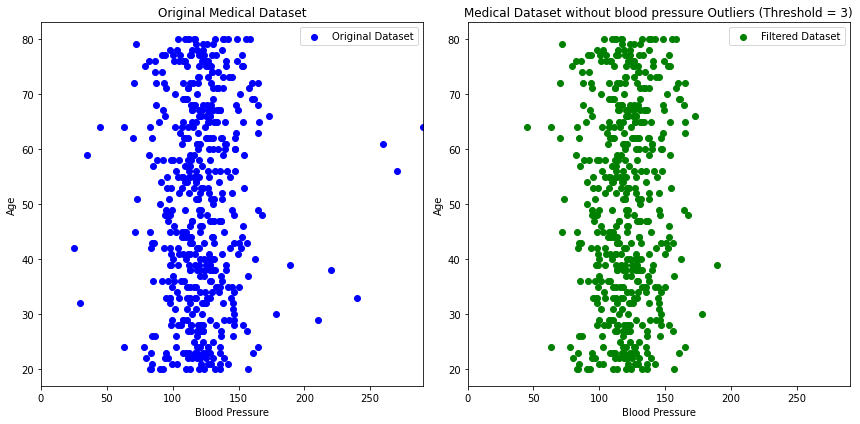

   patient_id       age  blood_pressure  cholesterol    weight
0   -1.725239 -1.433855       -0.865370    -0.636109 -0.148724
1   -1.718311 -0.493831        0.878071    -0.419690  0.077681
2   -1.711382 -0.715013       -1.005841     0.816989  0.443925
3   -1.704454 -0.272649       -1.866603     1.365765 -0.388448
4   -1.697526  0.059125       -0.123162     0.074982  0.011091


In [80]:
import pandas as pd #importing panda for df
from sklearn.impute import KNNImputer #importing KNNImputer from Scikit
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

data= pd.read_csv('larger_medical_dataset_500_hw1_q1.csv') #loading the csv file
small_data = pd.read_csv('larger_medical_dataset_500_hw1_q1.csv', nrows =10)

#print(data)
#print(small_data)
data.isna()#to check the missing value
data.isna().sum()#summ the NA values

#print(data.describe)
imputer = KNNImputer(n_neighbors = 5)#keeping the no of neighbours as 5
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)
#small_data_imputed = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

#print(data_imputed)
#print(small_data_imputed)
#data_imputed.isna().any()
data_imputed.isna().sum()#no NA value now
result = data_imputed.head(20)
#print(result)
#blood pressure normally follows normal distribution
threshold = 3
def dt_outlier_zscore(data, threshold = 3):#function to detect the outlier and the threhold is 3
    mean = np.mean(data) #mean
    std = np.std(data)#standard deviation
    z_scores = (data - mean)/std
    return np.abs(z_scores) > threshold #zscore

outliers = dt_outlier_zscore(data_imputed['blood_pressure'])#outliers in the column blood_pressure
data_cleaned = data_imputed[~outliers] #filtering outliers from the dataset

max_bp = max(data_imputed['blood_pressure'].max(), data_cleaned['blood_pressure'].max()) #set the max blood pressure value so that the x axis
#Visualise the orginal dataset
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(data_imputed['blood_pressure'],data_imputed['age'], color = 'blue', label = 'Original Dataset')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.title('Original Medical Dataset')
plt.legend()
plt.xlim(0, max_bp)

#Visualise the dataset with the outliers removed from Blood pressure column
#plt.figure(figsize = (12,6))
plt.subplot(1,2,2)
plt.scatter(data_cleaned['blood_pressure'],data_cleaned['age'], color = 'green', label = 'Filtered Dataset')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.title('Medical Dataset without blood pressure Outliers (Threshold = {})'.format(threshold))
plt.legend()
plt.xlim(0, max_bp)

plt.tight_layout()
plt.show()

scaling = StandardScaler() #create an object for standardscaler
scaled_data = pd.DataFrame(scaling.fit_transform(data_cleaned), columns = data_cleaned.columns)

print(scaled_data.head())

In [81]:
import pandas as pd #importing panda for df
from sklearn.impute import KNNImputer #importing KNNImputer from Scikit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


data = pd.read_csv('housing_data_hw1_q2.csv')#Load the dataset
#print(data.head())

corr_mat = data.corr(method = 'pearson')#Create the correlation matrix using pearson coeffecient
#print(corr_mat.head())


price_corr = corr_mat['price'].sort_values(ascending = False)#Sort the values in descending order for the correlation
#print()
#print(price_corr)

top_cor_features = price_corr.index[1:4]#exclude price
print("Top 3 features most correlated with price:\n",top_cor_features)

x = data.drop(columns = ['price'])#removing the price as its the target variable and not part of the feature set
y = data['price']#defining the target varibale
#print(x)
#print(y)

fit_model = LinearRegression()#Initialise a Linear Regression model
rec_fe = RFE(estimator = fit_model, n_features_to_select = 5)#using RFE for feature selection chossing n = 5 to recursively take only top 5 features and removing the others

rec_fe.fit(x,y)#this will help to fit the model to the feature set and target output

sel_fe_rfe = x.columns[rec_fe.support_]#to select the most import features use support_
print("The top 5 features selected by RFE are:\n",sel_fe_rfe)

Top 3 features most correlated with price:
 Index(['lot_size', 'neighborhood_rating', 'has_pool'], dtype='object')
The top 5 features selected by RFE are:
 Index(['proximity_to_amenities', 'num_bathrooms', 'garage_size', 'has_pool',
       'crime_rate'],
      dtype='object')


RFE Feature Ranking:
             Feature  Ranking
1                BMI        1
2        cholesterol        1
3     blood_pressure        1
4     smoking_habits        1
5  physical_activity        1
0                age        2

Entropy Based Feature Selection (Information Gain):
             Feature  Mutual Information
4     smoking_habits            0.002939
0                age            0.001523
5  physical_activity            0.001457
1                BMI            0.000000
2        cholesterol            0.000000
3     blood_pressure            0.000000

Top 5 Features from Entropy-Based feature Selection: ['smoking_habits', 'age', 'physical_activity', 'BMI', 'cholesterol']

Skewness of the Data:
 BMI                  0.023029
cholesterol          0.016705
blood_pressure      -0.000528
age                  0.008628
smoking_habits       0.023605
physical_activity   -0.001879
dtype: float64


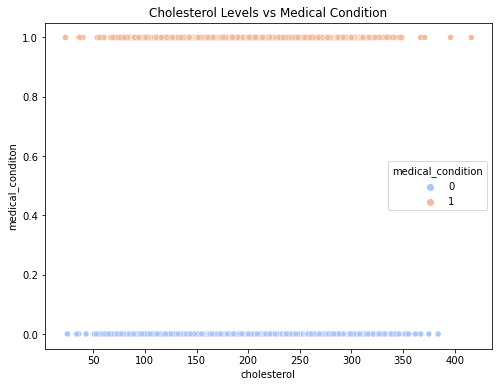

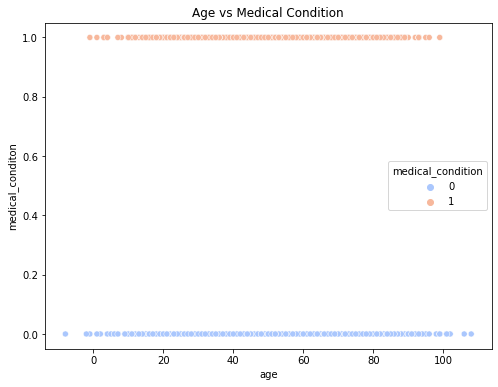

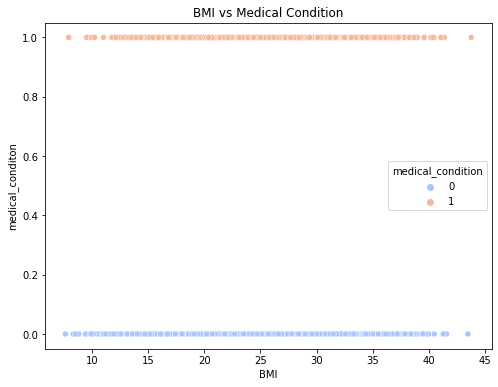

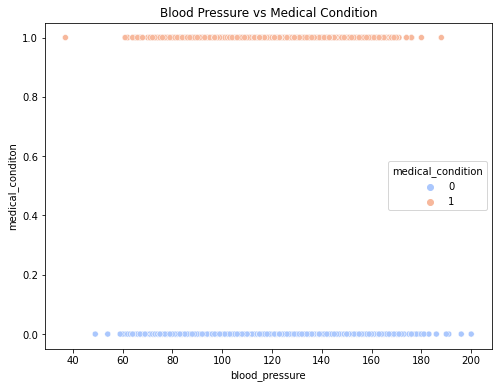

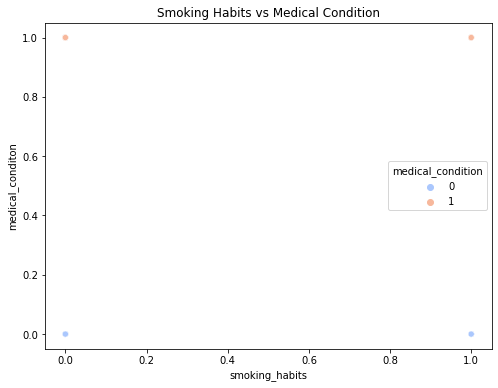

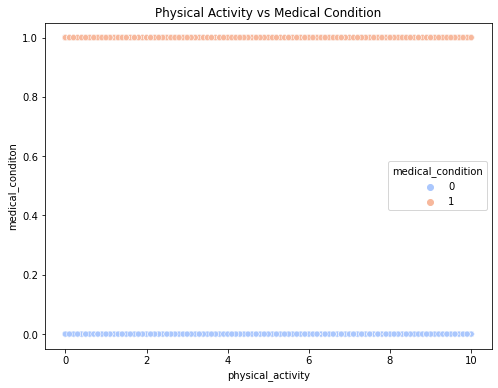

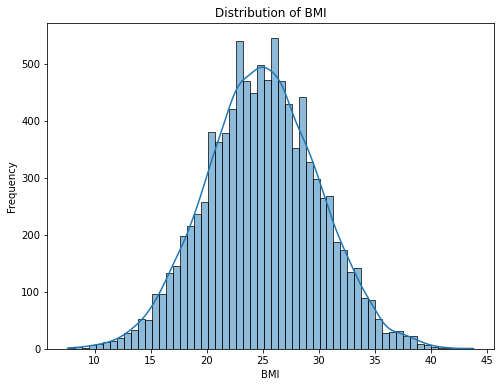

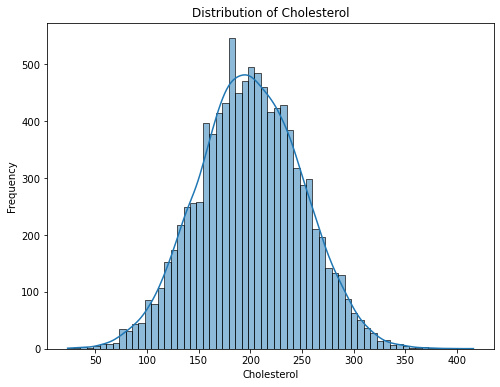

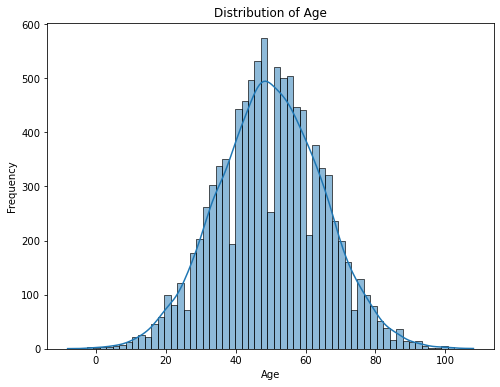

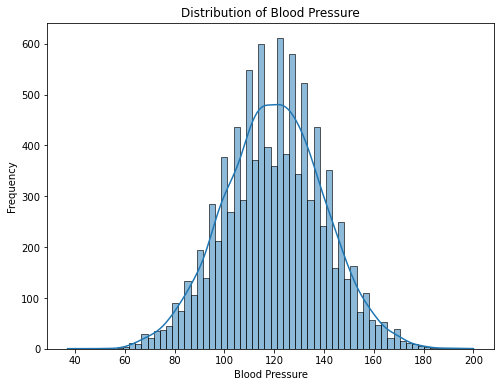

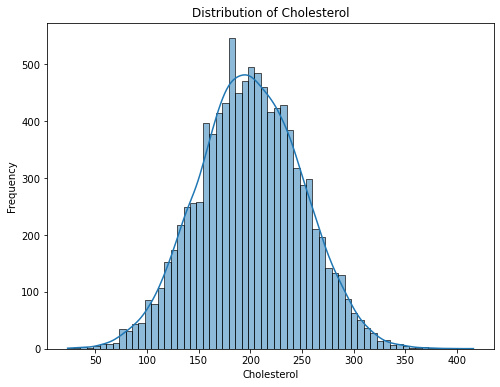

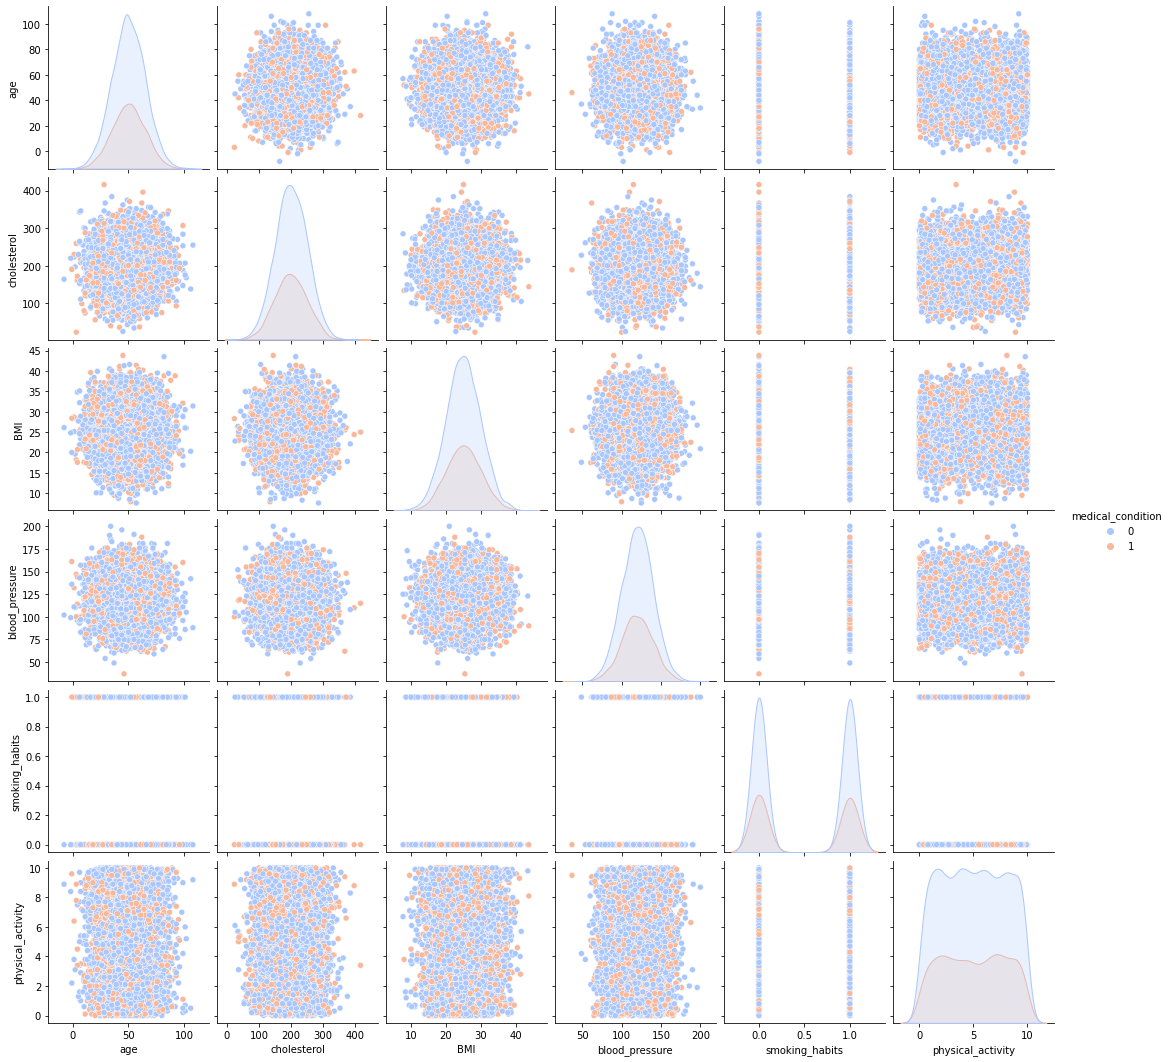

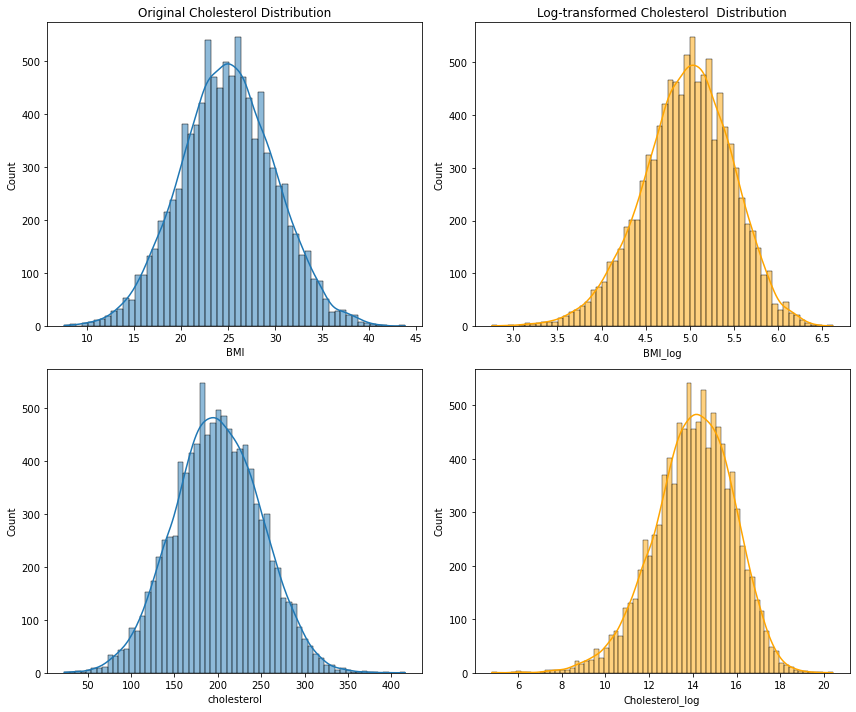


Classification Report fot Model trained on the top 5 Entropy-based features:
              precision    recall  f1-score   support

           0       0.70      0.49      0.57      2100
           1       0.30      0.51      0.38       900

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.58      0.49      0.52      3000



In [84]:
import pandas as pd #importing panda for df
from sklearn.impute import KNNImputer #importing KNNImputer from Scikit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

data= pd.read_csv('medical_data_hw1_q3.csv')#load the data
#print(data.head())

#Scatter plot to visulize relation between mediacal features and the condition ie the y
#scatter rplot for cholestrol vs medical condition
plt.figure(figsize=(8,6))
sns.scatterplot(x = data['cholesterol'], y =data['medical_condition'], hue = data['medical_condition'], palette = 'coolwarm')#to create the scatter plot
plt.title('Cholesterol Levels vs Medical Condition')
plt.xlabel('cholesterol')
plt.ylabel('medical_conditon')
plt.show

#scatter plot for age vs mediacl condition
plt.figure(figsize=(8,6))
sns.scatterplot(x = data['age'], y =data['medical_condition'], hue = data['medical_condition'], palette = 'coolwarm')#to create the scatter plot
plt.title('Age vs Medical Condition')
plt.xlabel('age')
plt.ylabel('medical_conditon')
plt.show

#scatter plot for BMI vs medical condtion
plt.figure(figsize=(8,6))
sns.scatterplot(x = data['BMI'], y =data['medical_condition'], hue = data['medical_condition'], palette = 'coolwarm')#to create the scatter plot
plt.title('BMI vs Medical Condition')
plt.xlabel('BMI')
plt.ylabel('medical_conditon')
plt.show

#scatter plot fot blood pressure vs medical condition
plt.figure(figsize=(8,6))
sns.scatterplot(x = data['blood_pressure'], y =data['medical_condition'], hue = data['medical_condition'], palette = 'coolwarm')#to create the scatter plot
plt.title('Blood Pressure vs Medical Condition')
plt.xlabel('blood_pressure')
plt.ylabel('medical_conditon')
plt.show

#scatter plot for smoking habits vs medical condition
plt.figure(figsize=(8,6))
sns.scatterplot(x = data['smoking_habits'], y =data['medical_condition'], hue = data['medical_condition'], palette = 'coolwarm')#to create the scatter plot
plt.title('Smoking Habits vs Medical Condition')
plt.xlabel('smoking_habits')
plt.ylabel('medical_conditon')
plt.show

#scatter plot for physical activity vs medical condtion
plt.figure(figsize=(8,6))
sns.scatterplot(x = data['physical_activity'], y =data['medical_condition'], hue = data['medical_condition'], palette = 'coolwarm')#to create the scatter plot
plt.title('Physical Activity vs Medical Condition')
plt.xlabel('physical_activity')
plt.ylabel('medical_conditon')
plt.show

#Distribution plot for BMI
plt.figure(figsize=(8,6))
sns.histplot(data['BMI'], kde = True)#creating the histogram and using the KDE curve to smooth out the histogram
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show

#Distibution plot for Cholesterol levels
plt.figure(figsize=(8,6))
sns.histplot(data['cholesterol'], kde = True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show

#Distrbution plot for age
plt.figure(figsize=(8,6))
sns.histplot(data['age'], kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show

#Distribution plot for blood pressure
plt.figure(figsize=(8,6))
sns.histplot(data['blood_pressure'], kde = True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show

#smoking habits
plt.figure(figsize=(8,6))
sns.histplot(data['cholesterol'], kde = True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show

#to make pair plot for all medcial features with medical condition

sns.pairplot(data[['age','cholesterol','BMI', 'blood_pressure','smoking_habits','physical_activity','medical_condition']], hue = 'medical_condition', diag_kind = 'kde', palette = 'coolwarm')#diagonal kind is kde
plt.show

#RFE using Logistic Regression for top 5 features
x = data.drop(columns = ['medical_condition'])#create the feature set ecluding the y target output
y = data['medical_condition']#target output y is the medical condition

model = LogisticRegression(max_iter = 1000)#creating the model for Logistic regression and keeping max no of iteration to 1000 as the default value is less
rfe = RFE(model, n_features_to_select = 5)#initializing the rfe model
rfe.fit(x,y)#to make it fit to the dataset

ranking = rfe.ranking_#to rank the features 
fe_rank = pd.DataFrame({'Feature':x.columns, 'Ranking': ranking})
fe_rank.sort_values(by='Ranking', inplace = True)
print("RFE Feature Ranking:")
print(fe_rank)

#Entropy based feature selection we are using information gain
mut_in = mutual_info_classif(x,y)#to calculate the mutual information of each feature
mut_in_df = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mut_in})#create the dataframe to store the mutula information 
mut_in_df.sort_values(by='Mutual Information', ascending = False, inplace= True)#sort the feature according to the descending 
print("\nEntropy Based Feature Selection (Information Gain):")
print(mut_in_df)

top_fe_ent = mut_in_df.head(5)['Feature'].tolist()#select top 5 features based on mutula informaton
print("\nTop 5 Features from Entropy-Based feature Selection:", top_fe_ent)

#to check the skewness of the medical features before applying Log transformation
skew = data[['BMI','cholesterol','blood_pressure','age','smoking_habits','physical_activity']].skew()
print()
print("Skewness of the Data:\n",skew)#We can see the data has minimum skewness so the transformation will not give significant change

#Data transformation using Log transformation only for positive values
data['BMI_log'] = np.log1p(data['BMI'])
data['Cholesterol_log'] = np.log1p(data['cholesterol'])
#data['Age_log'] = np.log1p(data['age'])
#data['Physical_log'] = np.log1p(data['physical_activity'])
#data['Blood_log'] = np.log1p(data['blood_pressure'])
#data['Smoking_log'] = np.log1p(data['smoking_habits'])
    
#Now apply square root transformation

data['BMI_log'] = np.sqrt(data['BMI'])
data['Cholesterol_log'] = np.sqrt(data['cholesterol'])
#data['Age_log'] = np.sqrt(data['age'])
#data['Physical_log'] = np.sqrt(data['physical_activity'])
#data['Blood_log'] = np.sqrt(data['blood_pressure'])
#data['Smoking_log'] = np.sqrt(data['smoking_habits'])
    
#Now plot the transformed features
fig,axes = plt.subplots(2, 2 , figsize = (12,10))
#the original and log transformed BMI
sns.histplot(data['BMI'], ax = axes[0,0] , kde = True)
axes[0,0].set_title('Original BMI Distribution')
sns.histplot(data['BMI_log'], ax = axes[0,1], kde = True, color = 'orange')
axes[0,1].set_title('Log-transformed BMI Distribution')

#for cholesterol
sns.histplot(data['cholesterol'], ax = axes[1,0] , kde = True)
axes[0,0].set_title('Original Cholesterol Distribution')
sns.histplot(data['Cholesterol_log'], ax = axes[1,1], kde = True, color = 'orange')
axes[0,1].set_title('Log-transformed Cholesterol  Distribution')

plt.tight_layout()
plt.show()

#Implemeting the model using entropy based selected feature
top_5_features = top_fe_ent#use the top 5 features selected by information gain for model training
x_sel = data[top_5_features]#split the data using the selected features
y = data['medical_condition']

#split into training an dtesting data
x_train, x_test, y_train,y_test = train_test_split(x_sel,y, test_size = 0.3, random_state = 42)#now plitting the dataset so 30% will be sued for testing and the rest 70% for traning

model_sel = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
model_sel.fit(x_train, y_train)#now fit the training data


y_pred = model_sel.predict(x_test)

report = classification_report(y_test,y_pred, zero_division = 1)#generate the classification report
print("\nClassification Report fot Model trained on the top 5 Entropy-based features:")
print(report)



